In [1]:

packages <- c(
    "ggplot2", 
    "dplyr", 
    "patchwork",
    "ggExtra"
)
for (pkg in packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
lm_results_file_path <- file.path(
    "../results/all_features_beta_df.parquet"
)
plot_save_dir <- file.path(
    "../figures"
)
if (!dir.exists(plot_save_dir)) {
    dir.create(plot_save_dir, recursive = TRUE)
}
plot_file_path <- file.path(
    plot_save_dir,
    "lm_coefficients_colored_by_feature_type.png"
)

plot_file_path2 <- file.path(
    plot_save_dir,
    "lm_coefficients_colored_by_channel.png"
)
lm_coeff_df <- arrow::read_parquet(lm_results_file_path)
# shuffle the row order for plotting purposes
lm_coeff_df <- lm_coeff_df %>%
    dplyr::mutate(
        row_id = 1:nrow(lm_coeff_df)
    ) %>%
    dplyr::arrange(dplyr::desc(row_id)) %>%
    dplyr::select(-row_id)
head(lm_coeff_df)

beta,p_value,variate,r2,feature,Compartment,Feature_type,Channel,Channel2,featurizer_id,feature_number,Measurement,p_value_corrected
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1.389132e-03,4.027724e-36,Dose,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,2.560208e-35
-6.507593e-04,3.219243e-02,Cell count,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,5.342914e-02
1.739169e-02,1.992699e-34,Time,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,1.214598e-33
-8.530284e-02,1.245588e-01,const,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,1.767468e-01
-7.025796e-05,4.230264e-01,Dose,0.4111726,feature,scDINO,scDINO,DNA,NA,scDINO,99,scDINO,5.039855e-01
-8.053319e-04,2.668872e-03,Cell count,0.4111726,feature,scDINO,scDINO,DNA,NA,scDINO,99,scDINO,5.379193e-03


In [3]:
font_size <- 24
plot_themes <- (
    theme_bw()
    + theme(
        legend.text = element_text(size = font_size),
        legend.title = element_text(size = font_size),
        axis.title.x = element_text(size = font_size),
        axis.text.x = element_text(size = font_size),
        axis.title.y = element_text(size = font_size),
        axis.text.y = element_text(size = font_size),
        strip.text = element_text(size = font_size),
    )
)

In [4]:
lm_coeff_df$log10p_value <- -log10(lm_coeff_df$p_value)
# remove the const from the variate column
lm_coeff_df <- lm_coeff_df %>%
    filter(
        !grepl("const", variate)
    )
# if the log10p is inf then set to the max value
lm_coeff_df$log10p_value[is.infinite(lm_coeff_df$log10p_value)] <- max(
    lm_coeff_df$log10p_value[!is.infinite(lm_coeff_df$log10p_value)]
)

lm_coeff_df$Feature_type <- gsub(
    "RadialDistribution",
    "Radial\nDistibution",
    lm_coeff_df$Feature_type
)
head(lm_coeff_df)

beta,p_value,variate,r2,feature,Compartment,Feature_type,Channel,Channel2,featurizer_id,feature_number,Measurement,p_value_corrected,log10p_value
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1.389132e-03,4.027724e-36,Dose,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,2.560208e-35,35.3949403
-6.507593e-04,3.219243e-02,Cell count,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,5.342914e-02,1.4922462
1.739169e-02,1.992699e-34,Time,0.5253489,feature,scDINO,scDINO,DNA,NA,scDINO,9,scDINO,1.214598e-33,33.7005582
-7.025796e-05,4.230264e-01,Dose,0.4111726,feature,scDINO,scDINO,DNA,NA,scDINO,99,scDINO,5.039855e-01,0.3736325
-8.053319e-04,2.668872e-03,Cell count,0.4111726,feature,scDINO,scDINO,DNA,NA,scDINO,99,scDINO,5.379193e-03,2.5736723
1.691805e-02,3.091312e-40,Time,0.4111726,feature,scDINO,scDINO,DNA,NA,scDINO,99,scDINO,2.184963e-39,39.5098572


Warning message:
“Duplicated override.aes is ignored.”
Warning message:
“Duplicated override.aes is ignored.”


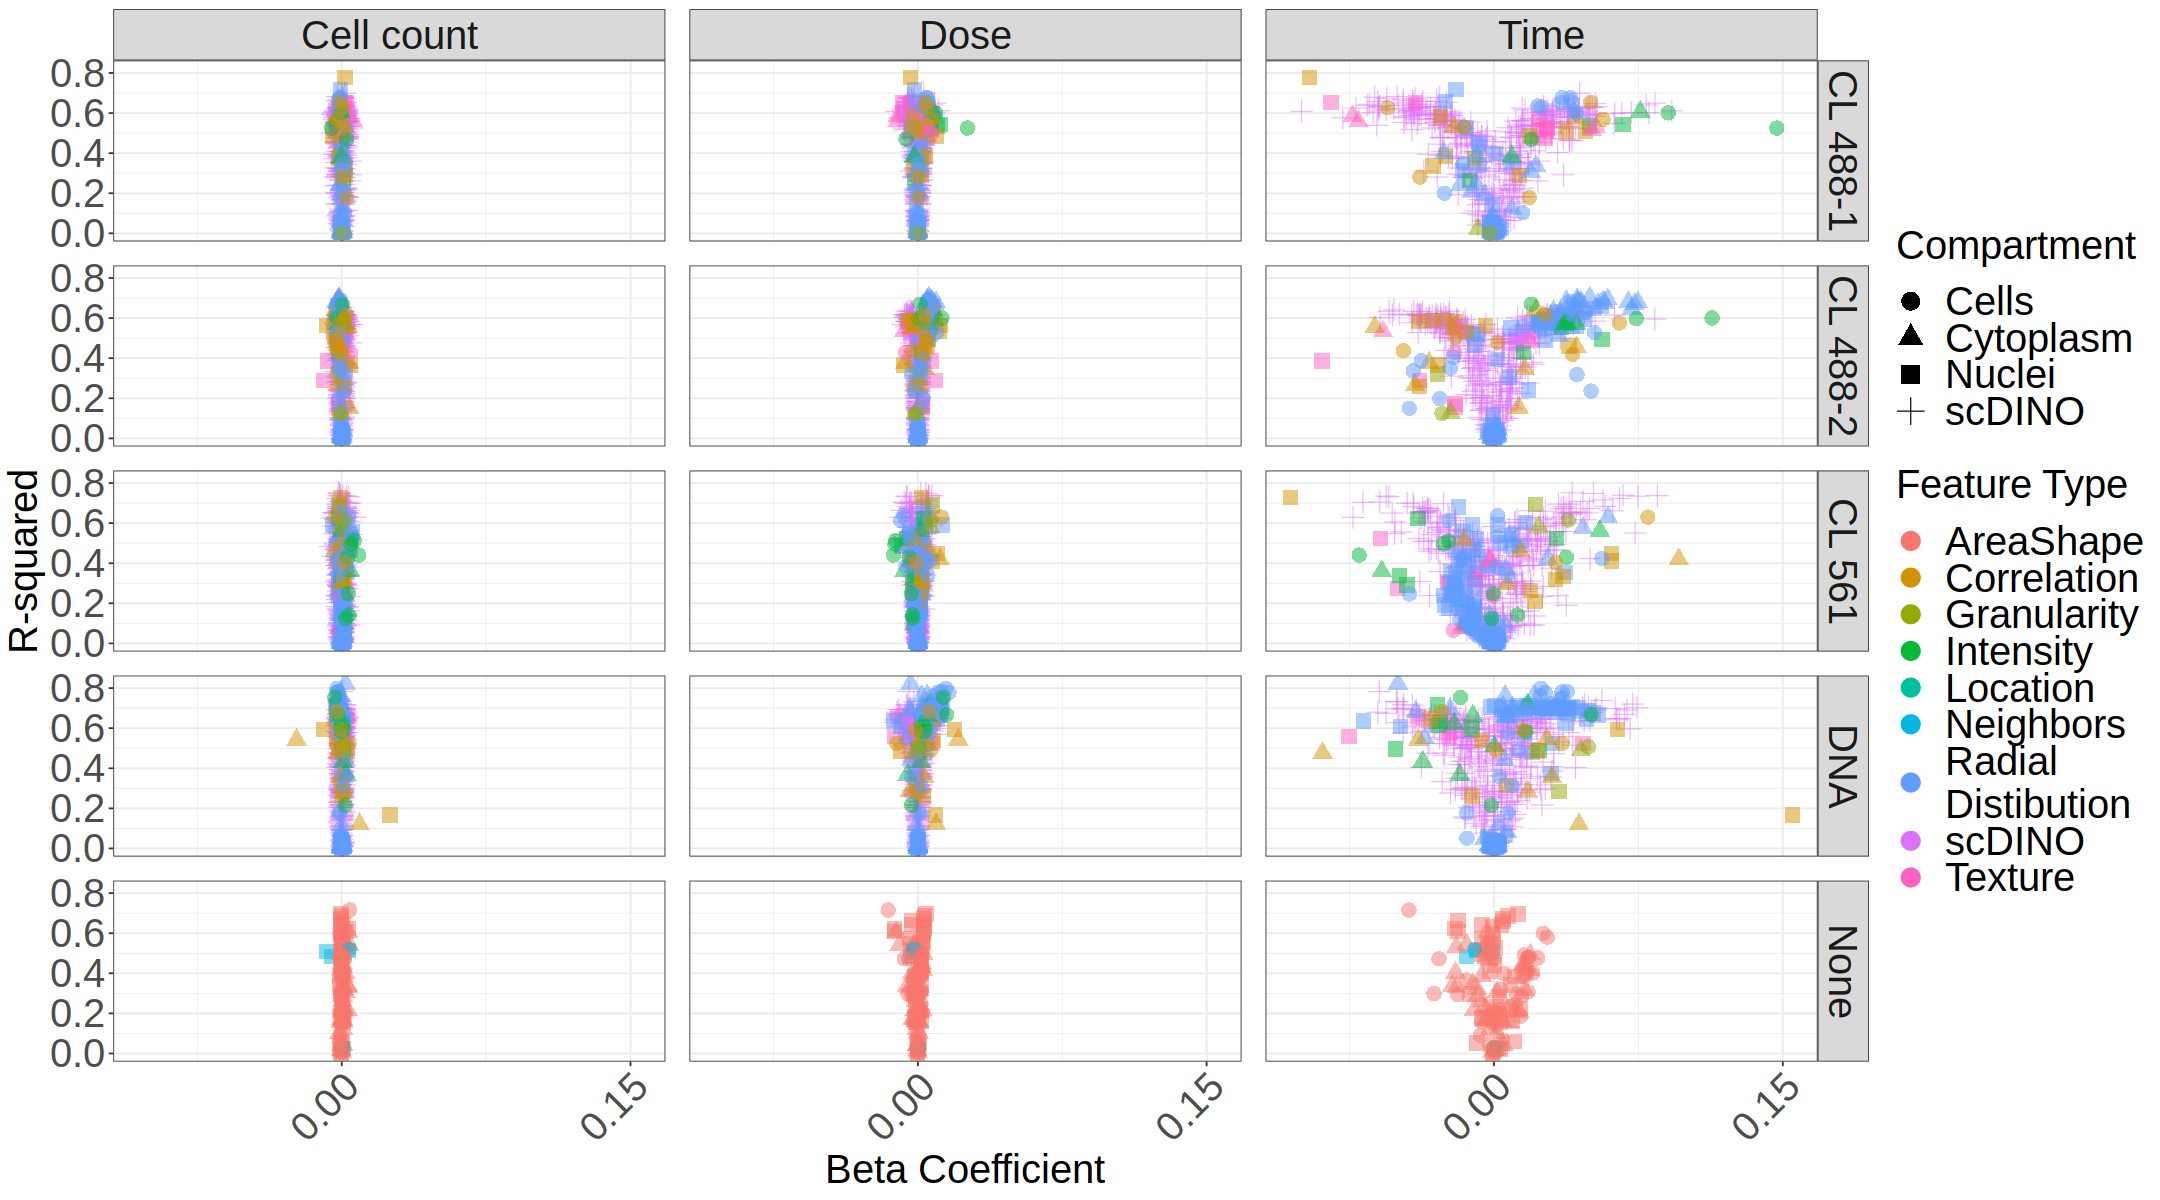

In [5]:
width <- 18
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
lm_coeff_plot <- (
    ggplot(lm_coeff_df, aes(
        x = beta, 
        y = r2, 
        fill = Feature_type, 
        )
    )
    + geom_point(
        aes(
            color = Feature_type,
            shape = Compartment
        ),
        alpha = 0.5,
        stroke = 0.5,
        size = 4
    )
    + labs(
        x = "Beta Coefficient",
        y = "R-squared",
    )
    + plot_themes
    + guides(
        fill = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Feature Type"
        ),
        color = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Feature Type"
        ),
    
        shape = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Compartment"
        )
    )

    + facet_grid(
        Channel ~ variate,

    )
    + theme(
        panel.spacing = unit(1, "lines"),  # Adjust spacing between facets
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)
        
    )
        # change the the x increments 
    + scale_x_continuous(
        breaks = seq(
            from = -0.15,
            to = 0.15,
            by = 0.15
        )
    )
)
ggsave(
    filename = plot_file_path,
    plot = lm_coeff_plot,
    device = "png",
    width = width,
    height = height,
    dpi = 600,
    units = "in",
)
lm_coeff_plot     


Warning message:
“Duplicated override.aes is ignored.”
Warning message:
“Duplicated override.aes is ignored.”


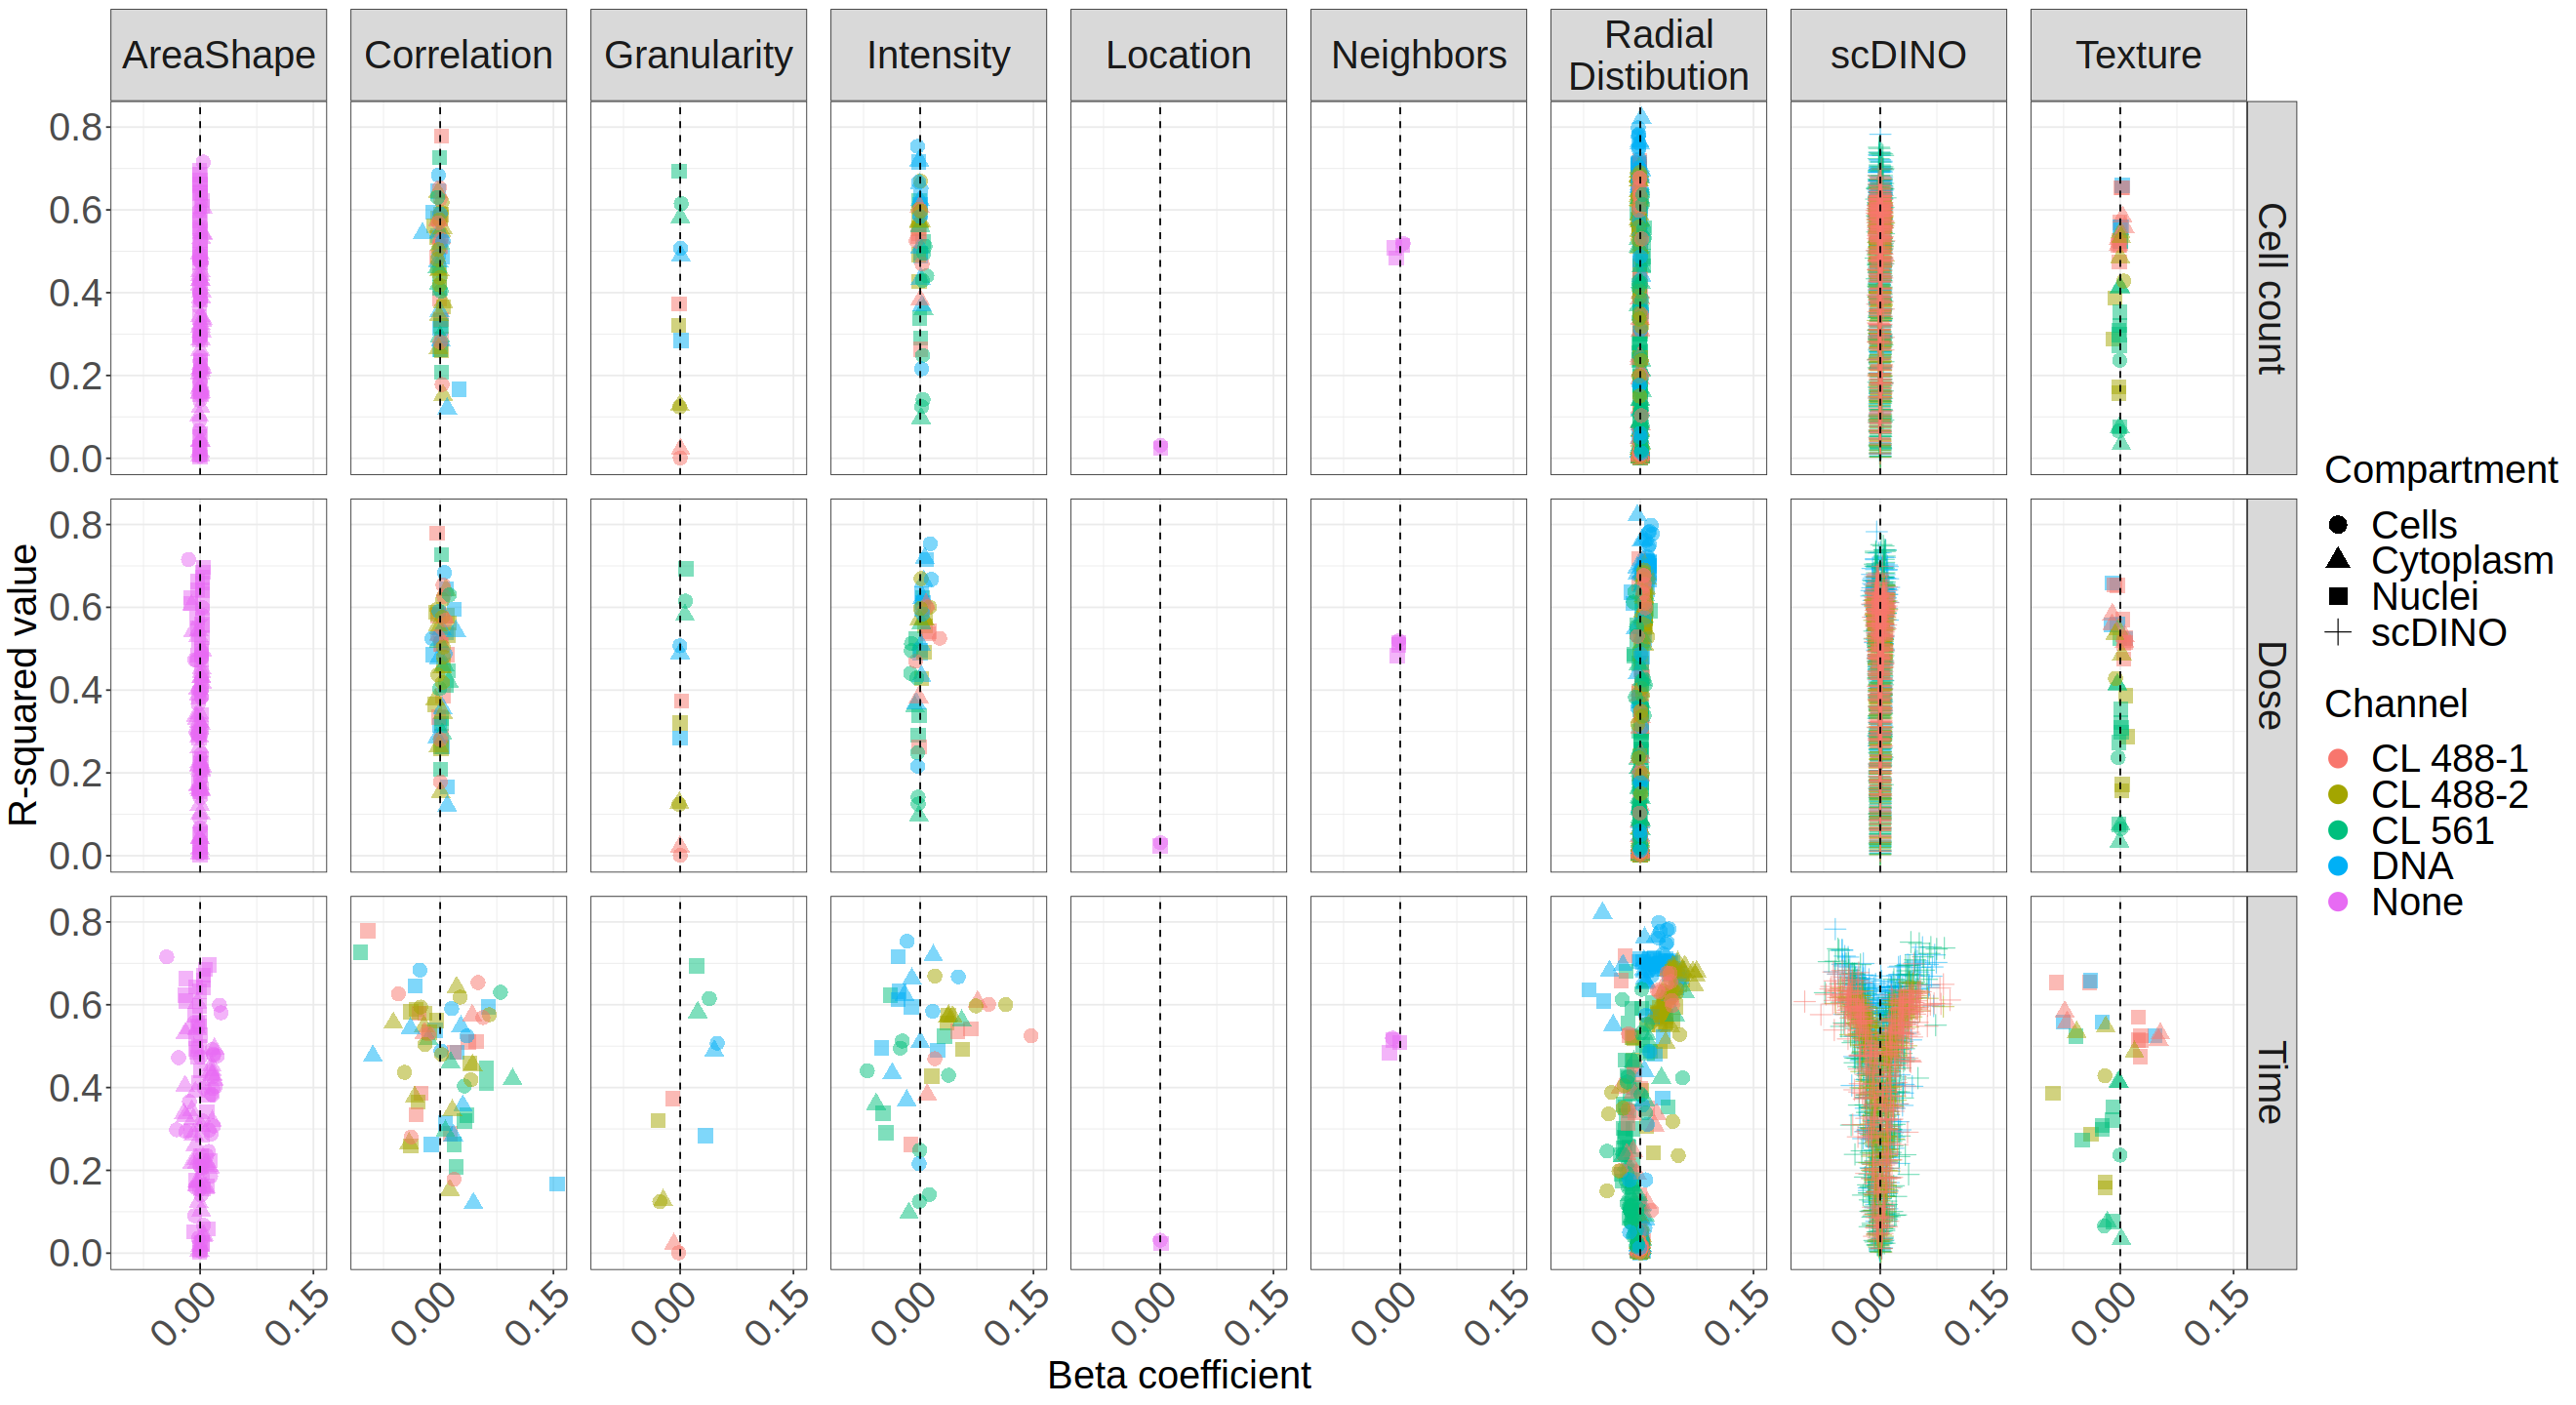

In [6]:
width <- 22
height <- 12
options(repr.plot.width = width, repr.plot.height = height)
lm_coeff_plot2 <- (
    ggplot(lm_coeff_df, aes(
        x = beta, 
        y = r2, 
        fill = Channel, 
        )
    )
    + geom_point(
        aes(
            color = Channel,
            shape = Compartment
        ),
        alpha = 0.5,
        stroke = 0.5,
        size = 4
    )
    + labs(
        x = "Beta coefficient",
        y = "R-squared value"
    )
    + plot_themes
    + guides(
        fill = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Channel"
        ),
        color = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Channel"
        ),
    
        shape = guide_legend(
            override.aes = list(size = 5, alpha = 1),
            title = "Compartment"
        )
    )
    + facet_grid(
        variate ~ Feature_type,

    )
    + geom_vline(
        xintercept = 0,
        linetype = "dashed",
    )
        + theme(
        panel.spacing = unit(1, "lines"),  # Adjust spacing between facets
        # x ticks rotation
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)
        
    )
        # change the the x increments 
    + scale_x_continuous(
        breaks = seq(
            from = -0.15,
            to = 0.15,
            by = 0.15
        )
    )
)
ggsave(
    filename = plot_file_path2,
    plot = lm_coeff_plot2,
    device = "png",
    width = width,
    height = height,
    dpi = 600,
    units = "in",
)
lm_coeff_plot2   
